# Crop Yeild Prediction - AAFC (Capstone) 
---
---

In [3]:
import pandas as pd                # importing required library 
import numpy as np

## Exploring all of the data files: 
---
#### 1). Crop Yield Canola. 

In [4]:
crop_yield_canola = pd.read_excel("Crop_Yield/Yield2010_2021_SKMB_Canola_Township_ED.xlsx")
crop_yield_canola.head(6)

,OBJECTID,TWP_ID,YieldKgAcre2010,YieldKgAcre2011,YieldKgAcre2012,YieldKgAcre2013,YieldKgAcre2014,YieldKgAcre2015,YieldKgAcre2016,YieldKgAcre2017,YieldKgAcre2018,YieldKgAcre2019,YieldKgAcre2020,YieldKgAcre2021,ECODISTRICT_ID,ECOREGION_ID,ECOZONE_ID,ECOPROVINCE_ID
0,1,00101E1,867.766846,746.765442,787.231293,1131.823547,881.470978,927.640442,739.822205,1260.589233,1169.278442,1150.015503,1131.083313,994.528046,852,162,10,10.1
1,2,00101W1,673.685028,670.953613,799.348114,1051.479919,990.792786,948.919067,704.518585,1208.910278,1149.666138,1140.450867,1126.362488,992.523376,852,162,10,10.1
2,3,00101W2,824.303864,591.453003,677.236389,839.030914,778.580139,686.634338,950.681091,872.101929,814.256714,916.208557,989.483490,782.133820,796,157,10,10.3
3,4,00101W3,432.694122,257.083649,412.948364,738.874359,466.009613,613.363098,1069.693237,268.218826,510.997971,765.065826,617.296875,291.780167,832,159,10,10.3
4,5,00102E1,1006.708496,806.171265,691.325684,1020.039307,1025.386475,989.774292,784.503601,1261.884399,1046.455566,1109.039917,1027.218506,742.924438,853,162,10,10.1
5,6,00102W1,869.040283,900.579681,810.553009,1133.082886,1207.175049,943.321564,692.817413,1263.633728,1177.660034,1115.430298,1216.690125,924.829834,852,162,10,10.1


In [5]:
print("Shape of the dataset (rows, columns): ", crop_yield_canola.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(crop_yield_canola.isna().sum())      # There are null values in the data, only for those variables which have prediction values. 

Shape of the dataset (rows, columns):  (4429, 18)


Table to check number of null values in each column: 
OBJECTID            0
TWP_ID              0
YieldKgAcre2010    25
YieldKgAcre2011    25
YieldKgAcre2012    25
YieldKgAcre2013    25
YieldKgAcre2014    25
YieldKgAcre2015    25
YieldKgAcre2016    25
YieldKgAcre2017    25
YieldKgAcre2018    25
YieldKgAcre2019    25
YieldKgAcre2020    25
YieldKgAcre2021    25
ECODISTRICT_ID      0
ECOREGION_ID        0
ECOZONE_ID          0
ECOPROVINCE_ID      0
dtype: int64


In [6]:
# Let's check the description of the dataset by using python inbuilt describe() function.
# The main aim to do this is to see the minimum values are in negative or not, which will be useful in data wrangling.
crop_yield_canola.describe()

# There are some negative values. 

,OBJECTID,YieldKgAcre2010,YieldKgAcre2011,YieldKgAcre2012,YieldKgAcre2013,YieldKgAcre2014,YieldKgAcre2015,YieldKgAcre2016,YieldKgAcre2017,YieldKgAcre2018,YieldKgAcre2019,YieldKgAcre2020,YieldKgAcre2021,ECODISTRICT_ID,ECOREGION_ID,ECOZONE_ID,ECOPROVINCE_ID
count,4429.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,2215.000000,677.888760,661.955372,555.564539,875.463414,744.487304,852.798065,953.541082,819.645749,881.140800,922.452877,845.290291,517.474865,764.146534,154.774441,9.713479,9.954211
std,1278.686501,201.129450,194.200870,134.840633,163.794147,175.238845,177.831578,177.124692,254.294371,215.292476,214.804069,194.066720,222.039476,63.079609,8.188300,0.568959,0.561316
min,1.000000,61.697512,-325.360306,97.784988,220.435867,183.864082,75.713333,200.036247,68.043770,63.454632,151.188583,111.416973,6.940486,375.000000,91.000000,6.000000,6.500000
25%,1108.000000,538.498199,527.577682,468.806137,787.913261,632.723541,746.426704,858.333710,666.528992,754.246437,791.129593,728.536949,338.200699,726.000000,155.000000,9.000000,9.300000
50%,2215.000000,686.066940,672.151306,562.477783,892.029327,746.818176,873.257874,964.818527,847.807022,908.744507,954.401001,867.764084,521.801392,763.000000,156.000000,10.000000,10.200000
75%,3322.000000,815.191933,805.610794,652.120010,984.487579,864.296265,981.690201,1064.698273,1009.090851,1034.144623,1076.958450,986.393463,684.816803,816.000000,159.000000,10.000000,10.300000
max,4429.000000,1420.712280,1229.870605,1221.388916,1375.700684,1282.538330,1333.924316,3174.306152,1398.836426,1454.412720,3625.295044,1311.180359,1124.928345,855.000000,163.000000,10.000000,10.300000


In [7]:
print(crop_yield_canola.isna().sum())   

OBJECTID            0
TWP_ID              0
YieldKgAcre2010    25
YieldKgAcre2011    25
YieldKgAcre2012    25
YieldKgAcre2013    25
YieldKgAcre2014    25
YieldKgAcre2015    25
YieldKgAcre2016    25
YieldKgAcre2017    25
YieldKgAcre2018    25
YieldKgAcre2019    25
YieldKgAcre2020    25
YieldKgAcre2021    25
ECODISTRICT_ID      0
ECOREGION_ID        0
ECOZONE_ID          0
ECOPROVINCE_ID      0
dtype: int64


In [8]:
print("Number of Unique Township IDs: ", len(crop_yield_canola['TWP_ID'].unique()))      # all of the township IDs are unique here. 
print("Number of Eco Districts: ", len(crop_yield_canola['ECODISTRICT_ID'].unique()))    # we have 144 Ecodistricts.

Number of Unique Township IDs:  4429
Number of Eco Districts:  144


In [9]:
# Checking if each Ecodistrict has same number of Townships under them:
check = crop_yield_canola.groupby('ECODISTRICT_ID')['TWP_ID'].count()
check=check.to_frame()
print(check)
print("\n")
print("Sum of the number of Townships in each Ecodistrict: ", check['TWP_ID'].sum())

##############################################################################
# We can see that, each of the Ecodisticts doesn't have same number of Townships.
# All of them sum up to 4429, that is number of rows and also the unique number of Townships in this dataset. 

                TWP_ID
ECODISTRICT_ID        
375                 35
376                  1
379                  5
380                  3
647                 11
...                ...
851                 17
852                 26
853                  7
854                 16
855                  5

[144 rows x 1 columns]


Sum of the number of Townships in each Ecodistrict:  4429


---

#### 2). Climate data

In [10]:
climate_canola = pd.read_excel("Climate1985_2020/3WeeksRunningAvg/Canola_TWN_PRA_1985_2020_Climate_MovingAvg_week40.xlsx")
climate_canola.head(6)

,TWN_ID,Year,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,...,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,1010,1985,32.0,34.5,29.5,35.5,43.7,24.7,80.7,74.5,...,0.124762,0.259048,0.507143,0.753810,0.860952,0.883333,0.849524,0.848095,0.853810,0.869048
1,1010,1986,30.2,19.6,5.4,26.9,40.7,73.2,51.9,50.3,...,0.437619,0.288095,0.177619,0.074286,0.037619,0.055714,0.090952,0.147143,0.198571,0.290476
2,1010,1987,14.4,37.9,59.9,61.2,40.7,50.7,51.6,54.6,...,0.483333,0.365714,0.310000,0.415238,0.534286,0.570476,0.547143,0.551429,0.580000,0.586667
3,1010,1988,34.9,22.9,19.0,0.0,14.3,16.7,16.7,27.7,...,0.004286,0.027619,0.109524,0.164286,0.179524,0.142381,0.166190,0.216190,0.251905,0.247619
4,1010,1989,27.4,37.5,40.5,51.1,52.0,67.4,84.4,67.0,...,0.110952,0.194286,0.318095,0.384762,0.439524,0.459048,0.489048,0.509048,0.518571,0.480000
5,1010,1990,31.8,13.8,57.2,88.3,110.1,93.9,52.6,84.2,...,0.187143,0.103333,0.074762,0.060000,0.082381,0.090000,0.095714,0.133333,0.169524,0.199524


In [11]:
print("Shape of the dataset (rows, columns): ", climate_canola.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(climate_canola.isna().sum())      # There are no null values in the data. 

Shape of the dataset (rows, columns):  (252864, 128)


Table to check number of null values in each column: 
TWN_ID              0
Year                0
SumPcpn18_20        0
SumPcpn19_21        0
SumPcpn20_22        0
                   ..
AvgPrcnAWHC34_36    0
AvgPrcnAWHC35_37    0
AvgPrcnAWHC36_38    0
AvgPrcnAWHC37_39    0
AvgPrcnAWHC38_40    0
Length: 128, dtype: int64


In [12]:
# Let's check the description of the dataset by using python inbuilt describe() function.
# The main aim to do this is to see the minimum values are in negative or not, which will be useful in data wrangling.
pd.set_option("display.max_columns", None)  # To look at all of the columns.
climate_canola.describe()

# There are some negative values in the dataset.

,Year,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,SumPcpn26_28,SumPcpn27_29,SumPcpn28_30,SumPcpn29_31,SumPcpn30_32,SumPcpn31_33,SumPcpn32_34,SumPcpn33_35,SumPcpn34_36,SumPcpn35_37,SumPcpn36_38,SumPcpn37_39,SumPcpn38_40,SumEGDD_C18_20,SumEGDD_C19_21,SumEGDD_C20_22,SumEGDD_C21_23,SumEGDD_C22_24,SumEGDD_C23_25,SumEGDD_C24_26,SumEGDD_C25_27,SumEGDD_C26_28,SumEGDD_C27_29,SumEGDD_C28_30,SumEGDD_C29_31,SumEGDD_C30_32,SumEGDD_C31_33,SumEGDD_C32_34,SumEGDD_C33_35,SumEGDD_C34_36,SumEGDD_C35_37,SumEGDD_C36_38,SumEGDD_C37_39,SumEGDD_C38_40,SumHeatD18_20,SumHeatD19_21,SumHeatD20_22,SumHeatD21_23,SumHeatD22_24,SumHeatD23_25,SumHeatD24_26,SumHeatD25_27,SumHeatD26_28,SumHeatD27_29,SumHeatD28_30,SumHeatD29_31,SumHeatD30_32,SumHeatD31_33,SumHeatD32_34,SumHeatD33_35,SumHeatD34_36,SumHeatD35_37,SumHeatD36_38,SumHeatD37_39,SumHeatD38_40,SumFrostD18_20,SumFrostD19_21,SumFrostD20_22,SumFrostD21_23,SumFrostD22_24,SumFrostD23_25,SumFrostD24_26,SumFrostD25_27,SumFrostD26_28,SumFrostD27_29,SumFrostD28_30,SumFrostD29_31,SumFrostD30_32,SumFrostD31_33,SumFrostD32_34,SumFrostD33_35,SumFrostD34_36,SumFrostD35_37,SumFrostD36_38,SumFrostD37_39,SumFrostD38_40,AvgSI18_20,AvgSI19_21,AvgSI20_22,AvgSI21_23,AvgSI22_24,AvgSI23_25,AvgSI24_26,AvgSI25_27,AvgSI26_28,AvgSI27_29,AvgSI28_30,AvgSI29_31,AvgSI30_32,AvgSI31_33,AvgSI32_34,AvgSI33_35,AvgSI34_36,AvgSI35_37,AvgSI36_38,AvgSI37_39,AvgSI38_40,AvgPrcnAWHC18_20,AvgPrcnAWHC19_21,AvgPrcnAWHC20_22,AvgPrcnAWHC21_23,AvgPrcnAWHC22_24,AvgPrcnAWHC23_25,AvgPrcnAWHC24_26,AvgPrcnAWHC25_27,AvgPrcnAWHC26_28,AvgPrcnAWHC27_29,AvgPrcnAWHC28_30,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
count,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000,252864.000000
mean,2002.500000,28.038483,33.564695,37.006047,44.420767,49.124721,56.465444,56.272135,54.410296,52.482650,49.332952,44.152933,38.837915,37.270513,38.148477,36.862362,32.398438,31.517495,28.927480,28.864526,23.656054,21.769548,101.391240,121.339474,152.795093,174.581326,195.509575,206.196147,223.218059,239.812252,253.281824,262.970082,270.731313,273.435229,270.354604,259.965142,247.793197,231.835114,209.808785,178.918357,

In [13]:
# We know that the data is for years 1985-2020 (as given in the meta data file). We will filter it for 2010-2020. 
climate_canola=climate_canola[(climate_canola['Year']>=2010) & (climate_canola['Year']<=2020)]
print("Shape of the filtered dataset (rows, columns): ",climate_canola.shape)

Shape of the filtered dataset (rows, columns):  (77264, 128)


In [14]:
# Checking if we filtered it properly for the years 2010-2020.
print("Year range for this data: \n",min(climate_canola['Year']),max(climate_canola['Year']))

Year range for this data: 
 2010 2020


In [15]:
# Checking if we have 4429 Township IDs
print("Unique township IDs: ", len(climate_canola["TWN_ID"].unique()))

Unique township IDs:  7024


##### We can see we have more Township IDs here, probably while joining these datasets on Township ID, we will be able to filter it out again to 4429 Township IDs. As of now, I am assuming this is because this dataset is for the whole prairies area.  

---

#### 3). ECV_SMOS data (remote sensing surface (5cm) soil moisture)

In [16]:
soil_moisture_canola = pd.read_csv("ECV_SMOS2010-2020/TWN_Canola_ECV_SMOS_Weekly_20100101.20201231.csv")
soil_moisture_canola.head(6)

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
0,00101E1,98,32.693829,32.693829,0.000000,32.693825,98,2011,129,19
1,00101W1,95,30.032328,32.693829,2.661501,30.844786,95,2011,129,19
2,00101W2,90,31.222174,31.222174,0.000000,31.222170,90,2011,129,19
3,00102E1,87,32.693829,39.018414,6.324585,35.456284,87,2011,129,19
4,00102W1,95,30.032328,30.032328,0.000000,30.032320,95,2011,129,19
5,00102W2,89,31.222174,32.963936,1.741762,31.496155,89,2011,129,19


In [17]:
# To show that the week starts from 23rd for the year 2010. 
soil_moisture_canola.sort_values(by=['YEAR', 'WEEK'])

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
922632,00101E1,98,29.625402,29.625402,0.000000,29.625401,98,2010,158,23
922633,00101W1,95,28.357340,29.625402,1.268063,28.744438,95,2010,158,23
922634,00101W2,90,21.227049,21.227049,0.000000,21.227049,90,2010,158,23
922635,00102E1,87,29.625402,34.054367,4.428965,31.559902,87,2010,158,23
922636,00102W1,95,28.357340,28.357340,0.000000,28.357347,95,2010,158,23
...,...,...,...,...,...,...,...,...,...,...
349099,11014W5,59,29.804443,35.373390,5.568947,32.447334,59,2020,279,40
349100,11015W5,44,35.373390,38.870007,3.496616,35.611794,44,2020,279,40
349101,11016W5,4,38.870007,38.870007,0.000000,38.870007,4,2020,279,40
349102,11017W5,38,38.538307,38.870007,0.331699,38.643055,38,2020,279,40


In [18]:
print("Shape of the dataset (rows, columns): ", soil_moisture_canola.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(soil_moisture_canola.isna().sum())      # There are null values in the data, in the columns MIN, MAX, RANGE, MEAN. 

Shape of the dataset (rows, columns):  (1546032, 10)


Table to check number of null values in each column: 
TWP_ID            0
VALID_COUNT       0
MIN            4044
MAX            4044
RANGE          4044
MEAN           4044
TOTAL_COUNT       0
YEAR              0
DOY               0
WEEK              0
dtype: int64


In [19]:
# Let's check the description of the dataset by using python inbuilt describe() function.
# The main aim to do this is to see the minimum values are in negative or not, which will be useful in data wrangling.
soil_moisture_canola.describe().round(3)    # I am rounding off because by default it is giving values in exponential. 

# There are no negative values. 

,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
count,1546032.000,1541988.000,1541988.000,1541988.000,1541988.000,1546032.000,1546032.000,1546032.000,1546032.000
mean,63.981,18.764,20.914,2.150,19.789,64.119,2015.101,201.548,29.181
std,27.391,7.233,8.099,3.484,7.510,27.228,3.112,46.035,6.571
min,0.000,0.000,0.000,0.000,0.000,1.000,2010.000,120.000,18.000
25%,47.000,14.169,15.750,0.000,14.993,47.000,2012.000,162.750,24.000
50%,73.000,18.399,20.183,0.974,19.301,73.000,2015.000,202.000,29.000
75%,86.000,22.673,24.960,2.925,23.763,86.000,2018.000,241.250,35.000
max,144.000,59.997,59.997,55.817,59.997,144.000,2020.000,280.000,40.000


In [20]:
print("Week range for this dataset \n",min(soil_moisture_canola['WEEK']),max(soil_moisture_canola['WEEK']))
# Checked if week range is from 18 to 40.

Week range for this dataset 
 18 40


In [21]:
# We know that the data is for the years 2010-2020, let's verify it.
print("Year range for this data: \n",min(soil_moisture_canola['YEAR']),max(soil_moisture_canola['YEAR']))

Year range for this data: 
 2010 2020


In [22]:
# Checking if we have 4429 Township IDs
print("Unique township IDs: ", len(soil_moisture_canola["TWP_ID"].unique()))

Unique township IDs:  6234


##### As you can see we have more Township IDs here, probably while joining these datasets on Township ID, we will be able to filter it out again to 4429 Township IDs. As of now, I am assuming this is because this dataset is for the whole prairies area.  
##### We have to convert the WEEK column to 3 week running mean and convert the column into separate columns, just like other datasets, in order to join them all.  

---

#### 4). NDVI MODIS data

In [23]:
ndvi_canola = pd.read_csv("NDVI_MODIS/3weekMovingAvg/Canola_TWP_MovingAvg.csv")
ndvi_canola.head(6)

,TWP_ID,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,NDVI26_28,NDVI27_29,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,NDVI_MAX
0,00101E1,2000,0.258661,0.311686,0.401711,0.471207,0.556656,0.593430,0.658336,0.696674,0.751784,0.768942,0.759668,0.714705,0.666111,0.608262,0.550412,0.515353,0.493043,0.476926,0.434332,0.800998
1,00101E1,2001,0.271472,0.299149,0.329158,0.360734,0.411387,0.476161,0.555059,0.633956,0.690760,0.744638,0.769349,0.775585,0.738828,0.683502,0.625861,0.568261,0.506879,0.442404,0.377830,0.795588
2,00101E1,2002,0.226186,0.242399,0.254109,0.294525,0.324490,0.381464,0.437595,0.535246,0.630845,0.699629,0.730935,0.725283,0.697976,0.655635,0.615383,0.570338,0.539687,0.518576,0.477932,0.739600
3,00101E1,2003,0.244343,0.277896,0.319315,0.392025,0.473263,0.552172,0.615737,0.665826,0.717898,0.746930,0.747671,0.736302,0.702264,0.630573,0.528436,0.454829,0.425106,0.410432,0.384892,0.769433
4,00101E1,2004,0.235770,0.250572,0.258847,0.290806,0.342773,0.419997,0.489744,0.552942,0.616619,0.639717,0.643874,0.622110,0.667781,0.690917,0.708486,0.663586,0.624549,0.581973,0.547010,0.759248
5,00101E1,2005,0.247151,0.260610,0.293366,0.351687,0.420594,0.488571,0.527127,0.547600,0.551547,0.544044,0.535207,0.511188,0.492779,0.471747,0.441442,0.423501,0.400986,0.389528,0.370115,0.567460


In [24]:
print("Shape of the dataset (rows, columns): ", ndvi_canola.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(ndvi_canola.isna().sum())                            # We don't have any null values. 

Shape of the dataset (rows, columns):  (135324, 22)


Table to check number of null values in each column: 
TWP_ID       0
YEAR         0
NDVI18_20    0
NDVI19_21    0
NDVI20_22    0
NDVI21_23    0
NDVI22_24    0
NDVI23_25    0
NDVI24_26    0
NDVI25_27    0
NDVI26_28    0
NDVI27_29    0
NDVI28_30    0
NDVI29_31    0
NDVI30_32    0
NDVI31_33    0
NDVI32_34    0
NDVI33_35    0
NDVI34_36    0
NDVI35_37    0
NDVI36_38    0
NDVI_MAX     0
dtype: int64


In [25]:
# Let's check the description of the dataset by using python inbuilt describe() function.
# The main aim to do this is to see the minimum values are in negative or not, which will be useful in data wrangling.
pd.set_option("display.max_columns", None)
ndvi_canola.describe()   

# There are some negative values. 

,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,NDVI26_28,NDVI27_29,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,NDVI_MAX
count,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,1.353240e+05,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000
mean,2010.000000,0.313025,0.347685,0.385477,0.428882,0.479649,0.514072,0.576283,0.652651,0.690017,0.702909,0.699754,6.868438e-01,0.667902,0.640308,0.605468,0.566596,0.529251,0.495474,0.463672,0.740067
std,6.055323,0.075698,0.091250,0.104825,0.114391,0.118416,4.707628,4.707760,0.101875,0.095054,0.094928,0.102337,1.139361e-01,0.116817,0.123109,0.132069,0.137311,0.138305,0.135351,0.129381,0.085769
min,2000.000000,0.135081,0.142330,0.143798,0.146528,0.148692,-999.000000,-999.000000,0.184536,0.201432,0.198491,0.153054,1.555066e-07,0.152944,0.186193,0.176763,0.168183,0.162096,0.158145,0.158950,0.206999
25%,2005.000000,0.256624,0.278189,0.305662,0.342270,0.391922,0.452786,0.524515,0.591512,0.641346,0.659172,0.658632,6.429290e-01,0.612175,0.571906,0.521416,0.471712,0.428694,0.395066,0.367366,0.706725
50%,2010.000000,0.302091,0.335288,0.373325,0.418727,0.474484,0.537848,0.609066,0.671312,0.712903,0.729330,0.731721,7.233836e-01,0.703231,0.672491,0.633689,0.587324,0.541106,0.498705,0.459958,0.763907
75%,2015.000000,0.359687,0.406206,0.454567,0.507353,0.564674,0.622702,0.680916,0.729044,0.759259,0.770728,0.770702,7.655236e-01,0.753198,0.734222,0.711284,0.676769,0.636927,0.596967,0.556588,0.798675
max,2020.000000,0.745312,0.759313,0.786235,0.838193,0.856844,0.874961,0.883701,0.891958,0.899755,0.906360,0.906470,9.105128e-01,0.913480,0.903241,0.868292,0.862582,0.850550,0.865295,0.843222,0.980889


In [26]:
ndvi_canola.describe()   

,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,NDVI26_28,NDVI27_29,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,NDVI_MAX
count,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,1.353240e+05,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000,135324.000000
mean,2010.000000,0.313025,0.347685,0.385477,0.428882,0.479649,0.514072,0.576283,0.652651,0.690017,0.702909,0.699754,6.868438e-01,0.667902,0.640308,0.605468,0.566596,0.529251,0.495474,0.463672,0.740067
std,6.055323,0.075698,0.091250,0.104825,0.114391,0.118416,4.707628,4.707760,0.101875,0.095054,0.094928,0.102337,1.139361e-01,0.116817,0.123109,0.132069,0.137311,0.138305,0.135351,0.129381,0.085769
min,2000.000000,0.135081,0.142330,0.143798,0.146528,0.148692,-999.000000,-999.000000,0.184536,0.201432,0.198491,0.153054,1.555066e-07,0.152944,0.186193,0.176763,0.168183,0.162096,0.158145,0.158950,0.206999
25%,2005.000000,0.256624,0.278189,0.305662,0.342270,0.391922,0.452786,0.524515,0.591512,0.641346,0.659172,0.658632,6.429290e-01,0.612175,0.571906,0.521416,0.471712,0.428694,0.395066,0.367366,0.706725
50%,2010.000000,0.302091,0.335288,0.373325,0.418727,0.474484,0.537848,0.609066,0.671312,0.712903,0.729330,0.731721,7.233836e-01,0.703231,0.672491,0.633689,0.587324,0.541106,0.498705,0.459958,0.763907
75%,2015.000000,0.359687,0.406206,0.454567,0.507353,0.564674,0.622702,0.680916,0.729044,0.759259,0.770728,0.770702,7.655236e-01,0.753198,0.734222,0.711284,0.676769,0.636927,0.596967,0.556588,0.798675
max,2020.000000,0.745312,0.759313,0.786235,0.838193,0.856844,0.874961,0.883701,0.891958,0.899755,0.906360,0.906470,9.105128e-01,0.913480,0.903241,0.868292,0.862582,0.850550,0.865295,0.843222,0.980889


In [27]:
# We know that the data is for years 2000-2020 (as given in the meta data file). We will filter it for 2010-2020. 
ndvi_canola=ndvi_canola[(ndvi_canola['YEAR']>=2010) & (ndvi_canola['YEAR']<=2020)]
print("Shape of the filtered dataset (rows, columns): ",ndvi_canola.shape)

Shape of the filtered dataset (rows, columns):  (70884, 22)


In [28]:
# Checking if we filtered it properly for the years 2010-2020.
print("Year range for this data: \n",min(ndvi_canola['YEAR']),max(ndvi_canola['YEAR']))

Year range for this data: 
 2010 2020


In [29]:
# Checking if we have 4429 Township IDs
print("Unique township IDs: ", len(ndvi_canola["TWP_ID"].unique()))

Unique township IDs:  6444


##### We have more Township IDs here, probably while joining these datasets on Township ID, we will be able to filter it out again to 4429 Township IDs. As of now, I am assuming this is because this dataset is for the whole prairies area.  

---

## Data Munging: 

##### So far we have explored the data and filtered the datasets for the year range 2010-2020 (11 years).   
##### Now we will do more data wrangling. 
---
#### 1). Crop Yield Canola

In [30]:
# There are certain columns that are not required. We can drop them.    
crop_yield_canola.drop(['OBJECTID', 'ECOREGION_ID', 'ECOZONE_ID', 'ECOPROVINCE_ID'], axis=1, inplace=True)

In [31]:
#converting negative values to NaN values
for col in crop_yield_canola:
    if crop_yield_canola[col].dtype!=object:
        crop_yield_canola[col]=np.where(crop_yield_canola[col]<0,np.NaN,crop_yield_canola[col])

In [32]:
crop_yield_canola.dropna(inplace=True)

In [33]:
print(crop_yield_canola.isna().sum())     # We can see there are no Null values.

TWP_ID             0
YieldKgAcre2010    0
YieldKgAcre2011    0
YieldKgAcre2012    0
YieldKgAcre2013    0
YieldKgAcre2014    0
YieldKgAcre2015    0
YieldKgAcre2016    0
YieldKgAcre2017    0
YieldKgAcre2018    0
YieldKgAcre2019    0
YieldKgAcre2020    0
YieldKgAcre2021    0
ECODISTRICT_ID     0
dtype: int64


---
#### 2). Climate data

We will convert the negative values to 0. 

In [34]:
#converting negative values to 0
for col in climate_canola:
    if climate_canola[col].dtype!=object:
        climate_canola[col]=np.where(climate_canola[col]<0,0,climate_canola[col])

---
#### 3). ECV_SMOS data (remote sensing surface (5cm) soil moisture)

For this dataset, we know that the number of valid data pixels in the township (VALID_COUNT), if its ratio with total TOTAL_COUNT is too low (less than 50%), the data quality for this week is poor. We will remove those rows with poor data quality. We will also drop some columns which are not required as well as we have to convert the Week and mean column to 3 weeks running average for 18th to 40th weeks and melt it in such a way so that it can be joined with other datasets. 

In [35]:
# Removing rows which has Valid_count/Total_count ratio less than 0.5. 
soil_moisture_canola['ratio'] = soil_moisture_canola['VALID_COUNT']/soil_moisture_canola['TOTAL_COUNT']   # created a new column
soil_moisture_canola.drop(soil_moisture_canola[soil_moisture_canola.ratio < 0.5].index, inplace=True)

In [36]:
soil_moisture_canola.head()

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK,ratio
0,00101E1,98,32.693829,32.693829,0.000000,32.693825,98,2011,129,19,1.0
1,00101W1,95,30.032328,32.693829,2.661501,30.844786,95,2011,129,19,1.0
2,00101W2,90,31.222174,31.222174,0.000000,31.222170,90,2011,129,19,1.0
3,00102E1,87,32.693829,39.018414,6.324585,35.456284,87,2011,129,19,1.0
4,00102W1,95,30.032328,30.032328,0.000000,30.032320,95,2011,129,19,1.0


In [37]:
soil_moisture_canola.shape   # Looking at the number of rows after filtering the dataset.

(1539638, 11)

So, we have removed **6394** rows. [1546032-1539638 = 6394]
 


In [38]:
###########################################
# Sorting values so that we can calculate 3 week rolling mean
soil_moisture_canola.sort_values(by=['TWP_ID','YEAR', 'WEEK'], inplace=True)

In [39]:
soil_moisture_canola.head(6)

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK,ratio
922632,00101E1,98,29.625402,29.625402,0.0,29.625401,98,2010,158,23,1.0
984972,00101E1,98,26.253832,26.253832,0.0,26.253836,98,2010,165,24,1.0
137148,00101E1,98,32.528141,32.528141,0.0,32.528137,98,2010,172,25,1.0
299232,00101E1,98,19.335115,19.335115,0.0,19.335114,98,2010,179,26,1.0
430146,00101E1,98,11.992727,11.992727,0.0,11.992727,98,2010,186,27,1.0
835356,00101E1,98,13.699026,13.699026,0.0,13.699024,98,2010,193,28,1.0


In [40]:
# #replacing NA mean values with the avg of the week prior and after
# soil_moisture_canola['Previous']=soil_moisture_canola['MEAN'].fillna(method='ffill')
# soil_moisture_canola['Next']=soil_moisture_canola['MEAN'].fillna(method='bfill')

In [41]:
# soil_moisture_canola['MEAN']=np.where(soil_moisture_canola['MEAN']==np.NaN,(soil_moisture_canola.Previous+soil_moisture_canola.Next)/2,soil_moisture_canola['MEAN'])

In [42]:
# soil_moisture_canola.drop(columns=['Previous','Next'],inplace=True)
# print(soil_moisture_canola.isna().sum())  

In [43]:
# Calculating rolling average
soil_moisture_canola['sm_3_week'] = soil_moisture_canola.iloc[:,5].rolling(window=3).mean()

In [44]:
soil_moisture_canola.head()

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK,ratio,sm_3_week
922632,00101E1,98,29.625402,29.625402,0.0,29.625401,98,2010,158,23,1.0,NaN
984972,00101E1,98,26.253832,26.253832,0.0,26.253836,98,2010,165,24,1.0,NaN
137148,00101E1,98,32.528141,32.528141,0.0,32.528137,98,2010,172,25,1.0,29.469124
299232,00101E1,98,19.335115,19.335115,0.0,19.335114,98,2010,179,26,1.0,26.039029
430146,00101E1,98,11.992727,11.992727,0.0,11.992727,98,2010,186,27,1.0,21.285326


In [45]:
# Creating some new columns, to get col_names.

soil_moisture_canola['WEEK1'] = soil_moisture_canola['WEEK']-2
soil_moisture_canola['WEEK'] = soil_moisture_canola['WEEK'].apply(str)
soil_moisture_canola['WEEK1'] = soil_moisture_canola['WEEK1'].apply(str)
soil_moisture_canola['col_names'] = "SoilMoisture"+soil_moisture_canola['WEEK1']+"_"+soil_moisture_canola['WEEK']

In [46]:
soil_moisture_canola.head()

,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK,ratio,sm_3_week,WEEK1,col_names
922632,00101E1,98,29.625402,29.625402,0.0,29.625401,98,2010,158,23,1.0,NaN,21,SoilMoisture21_23
984972,00101E1,98,26.253832,26.253832,0.0,26.253836,98,2010,165,24,1.0,NaN,22,SoilMoisture22_24
137148,00101E1,98,32.528141,32.528141,0.0,32.528137,98,2010,172,25,1.0,29.469124,23,SoilMoisture23_25
299232,00101E1,98,19.335115,19.335115,0.0,19.335114,98,2010,179,26,1.0,26.039029,24,SoilMoisture24_26
430146,00101E1,98,11.992727,11.992727,0.0,11.992727,98,2010,186,27,1.0,21.285326,25,SoilMoisture25_27


In [47]:
# Creating pivot table, to convert long data to wide.
output = pd.pivot_table(data=soil_moisture_canola, index=['TWP_ID', 'YEAR'], values=['sm_3_week'], columns=['col_names'])

In [48]:
output

sm_3_week                                      \
col_names    SoilMoisture16_18 SoilMoisture17_19 SoilMoisture18_20   
TWP_ID  YEAR                                                         
00101E1 2010               NaN               NaN               NaN   
        2011         27.061699         27.627199         30.041478   
        2012         14.789425         13.749073         13.364138   
        2013         18.350772         25.530911         31.146724   
        2014         21.770903         26.054812         27.567995   
...                        ...               ...               ...   
11018W5 2016         24.886506         26.657872         31.415458   
        2017         24.168797         29.995901         36.035678   
        2018         21.425035         26.201830         34.354123   
        2019          5.219837         13.385332         23.836716   
        2020         27.928223         31.205701         32.573167   

                                                                    \
col_names    SoilMoisture19_21 SoilMoisture20_22 SoilMoisture21_23   
TWP_ID  YEAR                                                         
00101E1 2010               NaN               NaN               NaN   
        2011         30.776526         30.347748         29.370969   
        2012         13.024097         16.698533         18.498670   
        2013         30.798302         32.301329         32.746259   
        2014         25.415198         23.517646         22.238960   
...                        ...               ...               ...   
11018W5 2016         23.583794         25.103755         26.743755   
        2017         33.486724         34.419032         38.737109   
        2018         32.565873         29.644692         25.797663   
        2019         35.780636         36.209059         30.800759   
        2020         30.954536         25.981655         24.296399   

                                                                    \
col_names    SoilMoisture22_24 SoilMoisture23_25 SoilMoisture24_26   
TWP_ID  YEAR                                                         
00101E1 2010               NaN         29.469124         26.039029   
        2011         24.104584         24.598241         29.466194   
        2012         20.024051         19.688582         16.879898   
        2013         25.065036         18.048107         18.219820   
        2014         18.463416         21.842931         26.899768   
...                        ...               ...               ...   
11018W5 2016         29.934170         36.108183         33.365093   
        2017         37.105172         33.649328         36.892089   
        2018         25.075231         29.309367         29.622492   
        2019         25.203999         26.955020         32.266136   
        2020         24.904715         27.722865         29.513336   

                                                                    \
col_names    SoilMoisture25_27 SoilMoisture26_28 SoilMoisture27_29   
TWP_ID  YEAR                                                         
00101E1 2010         21.285326         15.008955         13.551171   
        2011         31.705049         25.024095         17.118592   
        2012         13.248060         10.257014         13.364488   
        2013         14.677471         16.049866         15.161645   
        2014         35.047699         31.360631         24.632144   
...                        ...               ...               ...   
11018W5 2016         33.850395         29.717874         27.687384   
        2017         36.977480         37.739318         30.994677   
        2018         31.613347         28.667566         25.516804   
        2019         30.426726         25.540258         25.568238   
        2020         29.800254         30.708689         29.214015   

                                                                    \
col_names    SoilMoisture28

In [49]:
output.columns = output.columns.droplevel(0)    #remove sm_3_week
output.columns.name = None                      #remove col_names
output = output.reset_index()                   #index to columns

In [50]:
output.head(10)

,TWP_ID,YEAR,SoilMoisture16_18,SoilMoisture17_19,SoilMoisture18_20,SoilMoisture19_21,SoilMoisture20_22,SoilMoisture21_23,SoilMoisture22_24,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,00101E1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.469124,26.039029,21.285326,15.008955,13.551171,16.047309,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,00101E1,2011,27.061699,27.627199,30.041478,30.776526,30.347748,29.370969,24.104584,24.598241,29.466194,31.705049,25.024095,17.118592,12.088430,11.656416,13.067006,12.259018,10.962354,11.067690,12.393230,12.878415,16.048892,16.339756,16.916437
2,00101E1,2012,14.789425,13.749073,13.364138,13.024097,16.698533,18.498670,20.024051,19.688582,16.879898,13.248060,10.257014,13.364488,12.164644,12.259482,11.656875,14.193643,14.463289,13.531056,10.850650,8.974640,7.387093,6.731918,6.235354
3,00101E1,2013,18.350772,25.530911,31.146724,30.798302,32.301329,32.746259,25.065036,18.048107,18.219820,14.677471,16.049866,15.161645,20.299085,20.228838,20.471527,17.000901,16.707677,18.353434,20.625101,22.306758,17.412074,15.750943,15.660199
4,00101E1,2014,21.770903,26.054812,27.567995,25.415198,23.517646,22.238960,18.463416,21.842931,26.899768,35.047699,31.360631,24.632144,18.857822,16.070272,14.138311,10.398432,12.179173,15.950552,21.388720,20.752620,21.834875,21.248439,23.679921
5,00101E1,2015,19.001184,16.582438,17.778681,24.154398,24.145700,24.262749,24.846179,27.240363,25.727639,22.007911,22.651297,22.027760,21.804145,20.006067,18.885728,17.589548,16.635452,19.122864,24.483980,29.312009,29.514476,27.187728,23.248978
6,00101E1,2016,19.617123,15.228451,11.488989,18.716074,28.668586,34.779685,35.436823,32.267561,31.205053,28.432124,31.709713,35.201611,34.612556,33.263322,30.583101,30.909234,25.643000,24.035673,29.568239,32.682846,36.211423,31.134931,31.517845
7,00101E1,2017,27.839141,23.736911,19.887353,19.827507,19.567349,18.133969,18.405422,17.744637,17.436276,13.790560,14.945264,16.058013,16.810762,14.423446,12.962585,13.468526,13.978125,13.642804,12.078038,12.022979,16.193805,21.344958,22.598895
8,00101E1,2018,17.932891,10.593364,8.650528,8.955512,12.132621,10.997409,13.627816,11.994925,13.572433,12.195071,13.712044,12.771454,11.428875,10.106140,10.157350,8.467177,6.939829,10.009488,11.259211,17.378890,18.415169,23.308654,22.298461
9,00101E1,2019,22.055455,19.160762,19.503384,17.994062,16.751177,13.344571,11.980510,13.849619,16.160618,15.885643,14.823568,14.582434,12.496372,9.543352,6.884372,10.692675,11.457482,15.456112,16.604016,22.189187,22.879833,28.697190,35.444891


In [51]:
# Dropping columns
soil_moisture_canola = output
soil_moisture_canola.drop(columns=['SoilMoisture16_18', 'SoilMoisture17_19'], inplace=True)

In [52]:
soil_moisture_canola.head(5)

,TWP_ID,YEAR,SoilMoisture18_20,SoilMoisture19_21,SoilMoisture20_22,SoilMoisture21_23,SoilMoisture22_24,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,00101E1,2010,NaN,NaN,NaN,NaN,NaN,29.469124,26.039029,21.285326,15.008955,13.551171,16.047309,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,00101E1,2011,30.041478,30.776526,30.347748,29.370969,24.104584,24.598241,29.466194,31.705049,25.024095,17.118592,12.088430,11.656416,13.067006,12.259018,10.962354,11.067690,12.393230,12.878415,16.048892,16.339756,16.916437
2,00101E1,2012,13.364138,13.024097,16.698533,18.498670,20.024051,19.688582,16.879898,13.248060,10.257014,13.364488,12.164644,12.259482,11.656875,14.193643,14.463289,13.531056,10.850650,8.974640,7.387093,6.731918,6.235354
3,00101E1,2013,31.146724,30.798302,32.301329,32.746259,25.065036,18.048107,18.219820,14.677471,16.049866,15.161645,20.299085,20.228838,20.471527,17.000901,16.707677,18.353434,20.625101,22.306758,17.412074,15.750943,15.660199
4,00101E1,2014,27.567995,25.415198,23.517646,22.238960,18.463416,21.842931,26.899768,35.047699,31.360631,24.632144,18.857822,16.070272,14.138311,10.398432,12.179173,15.950552,21.388720,20.752620,21.834875,21.248439,23.679921


In [53]:
soil_moisture_canola.drop(columns=["SoilMoisture18_20","SoilMoisture19_21","SoilMoisture20_22","SoilMoisture21_23","SoilMoisture22_24"],inplace=True)

In [54]:
soil_moisture_canola.head(5)

,TWP_ID,YEAR,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,00101E1,2010,29.469124,26.039029,21.285326,15.008955,13.551171,16.047309,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,00101E1,2011,24.598241,29.466194,31.705049,25.024095,17.118592,12.088430,11.656416,13.067006,12.259018,10.962354,11.067690,12.393230,12.878415,16.048892,16.339756,16.916437
2,00101E1,2012,19.688582,16.879898,13.248060,10.257014,13.364488,12.164644,12.259482,11.656875,14.193643,14.463289,13.531056,10.850650,8.974640,7.387093,6.731918,6.235354
3,00101E1,2013,18.048107,18.219820,14.677471,16.049866,15.161645,20.299085,20.228838,20.471527,17.000901,16.707677,18.353434,20.625101,22.306758,17.412074,15.750943,15.660199
4,00101E1,2014,21.842931,26.899768,35.047699,31.360631,24.632144,18.857822,16.070272,14.138311,10.398432,12.179173,15.950552,21.388720,20.752620,21.834875,21.248439,23.679921


In [55]:
print("Shape of the dataset (rows, columns): ", soil_moisture_canola.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(soil_moisture_canola.isna().sum())      # There are null values in the data, in the columns MIN, MAX, RANGE, MEAN. 

Shape of the dataset (rows, columns):  (68539, 18)


Table to check number of null values in each column: 
TWP_ID                 0
YEAR                   0
SoilMoisture23_25    113
SoilMoisture24_26    129
SoilMoisture25_27    105
SoilMoisture26_28     93
SoilMoisture27_29     35
SoilMoisture28_30     59
SoilMoisture29_31     67
SoilMoisture30_32     68
SoilMoisture31_33     56
SoilMoisture32_34     77
SoilMoisture33_35     83
SoilMoisture34_36     72
SoilMoisture35_37    110
SoilMoisture36_38     76
SoilMoisture37_39    117
SoilMoisture38_40    755
dtype: int64


In [56]:
soil_moisture_canola.describe()
# There are no negative values

,YEAR,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
count,68539.000000,68426.000000,68410.000000,68434.000000,68446.000000,68504.000000,68480.000000,68472.000000,68471.000000,68483.000000,68462.000000,68456.000000,68467.000000,68429.000000,68463.000000,68422.000000,67784.000000
mean,2014.999854,21.808190,21.647412,20.912159,19.690027,19.128922,18.567088,18.085008,17.841674,17.651847,17.453288,17.460897,17.643968,18.317497,18.801480,19.215197,19.419503
std,3.162232,6.525641,6.544016,6.740445,6.670925,6.479363,6.401151,6.502944,6.704534,6.661398,6.645675,6.468409,6.691203,6.456923,6.253005,6.070440,5.695689
min,2010.000000,1.685574,1.490044,1.813730,1.632681,1.116296,1.226634,1.286839,1.004537,0.951070,0.782217,0.542668,0.775580,0.313220,0.217832,0.173613,0.192368
25%,2012.000000,17.512004,17.200023,16.395215,15.324552,14.940431,14.359196,13.644667,13.377593,13.323688,13.165393,13.163565,13.046516,13.935947,14.788081,15.582834,15.913899
50%,2015.000000,21.175031,20.820572,19.969786,18.728026,18.334226,17.958622,17.740873,17.557535,17.304882,17.223106,17.253165,17.526011,18.263503,18.808074,19.239109,19.299649
75%,2018.000000,25.345844,25.283414,24.305476,22.858260,22.352915,22.028138,21.789703,21.645103,21.443354,21.267530,21.229941,21.566866,22.080060,22.387427,22.671757,22.604474
max,2020.000000,56.971528,58.145569,55.160245,57.072725,57.422468,57.299403,57.185492,58.161045,56.489913,55.289516,57.246853,54.840993,55.525701,55.597389,58.430055,56.195824


In [57]:
soil_moisture_canola_mean = soil_moisture_canola.groupby(soil_moisture_canola['YEAR']).mean()

In [58]:
soil_moisture_canola_mean = soil_moisture_canola_mean.reset_index()

In [59]:
# years=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [60]:
# cols = list(soil_moisture_canola.columns)
# del cols[:2]

In [61]:
soil_moisture_canola_mean

,YEAR,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,2010,22.461937,20.813595,19.484671,18.255423,18.159889,17.188481,16.447343,16.326932,17.325898,17.665521,18.183285,19.432893,21.099924,22.685393,22.720916,21.966890
1,2011,24.773260,24.609737,22.757783,20.537066,19.925959,20.301700,19.428315,18.991824,18.161609,17.356843,17.517926,17.083798,16.883821,16.461870,15.948387,16.748367
2,2012,24.115362,24.152349,22.476572,19.712149,19.485508,18.835345,19.526866,18.792887,18.968793,18.417271,17.956095,17.168505,16.807240,16.082199,15.599145,15.666426
3,2013,23.880153,24.356556,23.128874,21.435217,19.900148,20.215095,19.587362,19.690502,18.899617,18.308497,17.329329,17.096137,17.456515,17.894789,18.636554,19.033790
4,2014,24.830347,25.423087,26.792542,24.349814,21.856127,19.923093,19.392355,19.819400,18.977093,19.837239,20.830534,22.234223,22.938111,22.635205,22.035394,21.462401
5,2015,19.774367,18.900509,17.995720,16.869527,17.430214,17.725110,18.754871,18.379480,18.365124,18.403719,18.419735,18.738490,19.927683,20.944614,21.593838,20.375490
6,2016,19.884249,20.091872,19.873049,20.614045,20.657089,20.273388,19.711999,20.320879,20.625929,20.693046,19.848865,20.356816,20.375287,21.008035,21.508674,22.034052
7,2017,21.690990,20.513619,18.099192,17.027560,16.313000,16.240382,16.221888,16.594884,16.739056,15.847893,14.880772,14.093782,14.700602,16.395697,17.623962,19.629577
8,2018,19.394075,18.466154,18.016644,18.027961,17.147298,16.013213,15.236467,15.267117,14.337072,13.421364,14.166435,14.599996,16.143576,17.230419,19.385537,19.913558
9,2019,17.996784,19.947976,20.263020,18.811481,18.009253,17.514841,16.693350,15.382103,16.046077,16.550785,17.718711,17.940763,19.592909,20.259544,20.664129,21.302160


In [62]:
soil_moisture_canola = soil_moisture_canola.fillna(-1)

In [63]:
for i in range(len(soil_moisture_canola)):
    for j in range(2, 18):
        y = soil_moisture_canola.iloc[i, 1]
        for k in range(len(soil_moisture_canola_mean)):
            if soil_moisture_canola_mean.iloc[k, 0]==y:
                a = soil_moisture_canola_mean[soil_moisture_canola_mean['YEAR']==y].index.values.item()
                b = j-1 
                if soil_moisture_canola.iloc[i, j] < 0:
                    soil_moisture_canola.iloc[i, j] = soil_moisture_canola_mean.iloc[a,b]  

In [64]:
soil_moisture_canola.isna().sum()

TWP_ID               0
YEAR                 0
SoilMoisture23_25    0
SoilMoisture24_26    0
SoilMoisture25_27    0
SoilMoisture26_28    0
SoilMoisture27_29    0
SoilMoisture28_30    0
SoilMoisture29_31    0
SoilMoisture30_32    0
SoilMoisture31_33    0
SoilMoisture32_34    0
SoilMoisture33_35    0
SoilMoisture34_36    0
SoilMoisture35_37    0
SoilMoisture36_38    0
SoilMoisture37_39    0
SoilMoisture38_40    0
dtype: int64

In [65]:
# This dataset is ready to use now
soil_moisture_canola.head()

,TWP_ID,YEAR,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,00101E1,2010,29.469124,26.039029,21.285326,15.008955,13.551171,16.047309,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,00101E1,2011,24.598241,29.466194,31.705049,25.024095,17.118592,12.088430,11.656416,13.067006,12.259018,10.962354,11.067690,12.393230,12.878415,16.048892,16.339756,16.916437
2,00101E1,2012,19.688582,16.879898,13.248060,10.257014,13.364488,12.164644,12.259482,11.656875,14.193643,14.463289,13.531056,10.850650,8.974640,7.387093,6.731918,6.235354
3,00101E1,2013,18.048107,18.219820,14.677471,16.049866,15.161645,20.299085,20.228838,20.471527,17.000901,16.707677,18.353434,20.625101,22.306758,17.412074,15.750943,15.660199
4,00101E1,2014,21.842931,26.899768,35.047699,31.360631,24.632144,18.857822,16.070272,14.138311,10.398432,12.179173,15.950552,21.388720,20.752620,21.834875,21.248439,23.679921


---
#### 4). NDVI MODIS data

We will convert negative values to 0.

In [66]:
# converting negative values to 0
for col in ndvi_canola:
    if ndvi_canola[col].dtype!=object:
        ndvi_canola[col]=np.where(ndvi_canola[col]<0,0,ndvi_canola[col])

In [67]:
# Removing NDVI_MAX column
ndvi_canola.drop(columns=['NDVI_MAX'], inplace=True)

---
## Data Joining: 

We have to join all of the datasets.     
Before that we are melting the yield dataset (converting it from wide to long).  

In [68]:
# Melting the yield dataset
crop_yield_canola_col=["TWP_ID","ECODISTRICT_ID"]+[col for col in crop_yield_canola if col.startswith("YieldKgAcre")]
crop_yield_canola=crop_yield_canola[crop_yield_canola_col]
crop_yield_canola_melt=pd.melt(crop_yield_canola,id_vars=['TWP_ID','ECODISTRICT_ID'],var_name='YEAR',value_name='YieldKgAcre')
crop_yield_canola_melt["YEAR"]=crop_yield_canola_melt["YEAR"].str.slice(start=11)

In [69]:
crop_yield_canola_melt['YEAR'] = crop_yield_canola_melt['YEAR'].astype(int)

In [70]:
# We are removing year 2021. 
crop_yield_canola_melt = crop_yield_canola_melt[crop_yield_canola_melt['YEAR']!=2021]

In [71]:
# General lookup at the dataset
print("Shape of the dataset (rows, columns): ", crop_yield_canola_melt.shape)      
print("\n")
print("Table to check number of null values in each column: ")
print(crop_yield_canola_melt.isna().sum())      # There are null values in the data, in the columns MIN, MAX, RANGE, MEAN. 

Shape of the dataset (rows, columns):  (48411, 4)


Table to check number of null values in each column: 
TWP_ID            0
ECODISTRICT_ID    0
YEAR              0
YieldKgAcre       0
dtype: int64


In [72]:
# Checking for negative values in the melted dataset.
soil_moisture_canola.describe()
# There are no negative values. 

,YEAR,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
count,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000,68539.000000
mean,2014.999854,21.807324,21.648768,20.913012,19.691287,19.129306,18.567585,18.084719,17.840575,17.652200,17.453286,17.461400,17.643602,18.316774,18.801494,19.216125,19.433623
std,3.162232,6.520684,6.538612,6.736522,6.667062,6.477869,6.398582,6.499908,6.701537,6.658820,6.642109,6.464954,6.688118,6.452276,6.250097,6.066371,5.667077
min,2010.000000,1.685574,1.490044,1.813730,1.632681,1.116296,1.226634,1.286839,1.004537,0.951070,0.782217,0.542668,0.775580,0.313220,0.217832,0.173613,0.192368
25%,2012.000000,17.519406,17.208334,16.403021,15.328201,14.941738,14.363277,13.648806,13.381783,13.327250,13.171620,13.167235,13.051872,13.944518,14.792898,15.590046,15.955767
50%,2015.000000,21.173015,20.825214,19.971156,18.733745,18.336091,17.962975,17.743059,17.554822,17.307948,17.226206,17.256800,17.523108,18.257397,18.808280,19.243820,19.361071
75%,2018.000000,25.332916,25.277443,24.303825,22.857945,22.350785,22.022397,21.785782,21.640158,21.440012,21.261436,21.222417,21.565336,22.075402,22.385536,22.670492,22.564334
max,2020.000000,56.971528,58.145569,55.160245,57.072725,57.422468,57.299403,57.185492,58.161045,56.489913,55.289516,57.246853,54.840993,55.525701,55.597389,58.430055,56.195824


---

In [73]:
# Joining yield and climate datasets.  

climate_yield_merged = pd.merge(crop_yield_canola_melt, climate_canola, left_on=['TWP_ID', 'YEAR'],right_on=['TWN_ID', 'Year'], how='inner')
climate_yield_merged.head()

,TWP_ID,ECODISTRICT_ID,YEAR,YieldKgAcre,TWN_ID,Year,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,SumPcpn26_28,SumPcpn27_29,SumPcpn28_30,SumPcpn29_31,SumPcpn30_32,SumPcpn31_33,SumPcpn32_34,SumPcpn33_35,SumPcpn34_36,SumPcpn35_37,SumPcpn36_38,SumPcpn37_39,SumPcpn38_40,SumEGDD_C18_20,SumEGDD_C19_21,SumEGDD_C20_22,SumEGDD_C21_23,SumEGDD_C22_24,SumEGDD_C23_25,SumEGDD_C24_26,SumEGDD_C25_27,SumEGDD_C26_28,SumEGDD_C27_29,SumEGDD_C28_30,SumEGDD_C29_31,SumEGDD_C30_32,SumEGDD_C31_33,SumEGDD_C32_34,SumEGDD_C33_35,SumEGDD_C34_36,SumEGDD_C35_37,SumEGDD_C36_38,SumEGDD_C37_39,SumEGDD_C38_40,SumHeatD18_20,SumHeatD19_21,SumHeatD20_22,SumHeatD21_23,SumHeatD22_24,SumHeatD23_25,SumHeatD24_26,SumHeatD25_27,SumHeatD26_28,SumHeatD27_29,SumHeatD28_30,SumHeatD29_31,SumHeatD30_32,SumHeatD31_33,SumHeatD32_34,SumHeatD33_35,SumHeatD34_36,SumHeatD35_37,SumHeatD36_38,SumHeatD37_39,SumHeatD38_40,SumFrostD18_20,SumFrostD19_21,SumFrostD20_22,SumFrostD21_23,SumFrostD22_24,SumFrostD23_25,SumFrostD24_26,SumFrostD25_27,SumFrostD26_28,SumFrostD27_29,SumFrostD28_30,SumFrostD29_31,SumFrostD30_32,SumFrostD31_33,SumFrostD32_34,SumFrostD33_35,SumFrostD34_36,SumFrostD35_37,SumFrostD36_38,SumFrostD37_39,SumFrostD38_40,AvgSI18_20,AvgSI19_21,AvgSI20_22,AvgSI21_23,AvgSI22_24,AvgSI23_25,AvgSI24_26,AvgSI25_27,AvgSI26_28,AvgSI27_29,AvgSI28_30,AvgSI29_31,AvgSI30_32,AvgSI31_33,AvgSI32_34,AvgSI33_35,AvgSI34_36,AvgSI35_37,AvgSI36_38,AvgSI37_39,AvgSI38_40,AvgPrcnAWHC18_20,AvgPrcnAWHC19_21,AvgPrcnAWHC20_22,AvgPrcnAWHC21_23,AvgPrcnAWHC22_24,AvgPrcnAWHC23_25,AvgPrcnAWHC24_26,AvgPrcnAWHC25_27,AvgPrcnAWHC26_28,AvgPrcnAWHC27_29,AvgPrcnAWHC28_30,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,00101W1,852.0,2010,673.685028,00101W1,2010,57.2,114.7,110.5,114.0,46.2,68.1,55.9,34.9,29.6,59.5,84.6,62.7,58.7,36.4,38.4,86.6,104.2,104.4,74.2,50.9,47.8,145.40,214.35,233.90,205.80,221.95,254.00,299.70,314.95,312.05,303.55,311.05,323.75,336.55,313.00,298.35,249.95,215.75,155.25,125.15,118.00,152.70,0,0,0,0,0,0,3,4,4,1,2,3,6,5,5,2,1,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,3,0.501905,0.466190,0.411905,0.285238,0.170952,0.089524,0.060476,0.024762,0.000000,0.007143,0.020476,0.061429,0.282857,0.494286,0.680952,0.640476,0.609048,0.564762,0.560000,0.553333,0.554286,0.837143,0.853333,0.860476,0.868095,0.820952,0.788571,0.747143,0.681905,0.590476,0.516667,0.486190,0.458571,0.447619,0.441905,0.449048,0.528095,0.611429,0.710952,0.762381,0.815238,0.842381
1,00101W2,796.0,2010,824.303864,00101W2,2010,39.0,96.4,109.8,101.2,111.4,153.0,163.6,98.8,42.4,24.4,75.8,74.2,107.2,42.0,49.0,27.2,46.4,40.4,40.8,21.4,20.0,138.20,179.10,192.90,177.70,216.15,256.85,303.45,310.60,300.50,284.65,311.05,327.00,340.20,318.00,296.40,252.55,213.80,156.60,130.65,125.20,163.60,0,0,0,0,0,0,2,2,2,0,3,5,7,6,6,4,2,0,1,1,1,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,4,3,0.595714,0.548571,0.490952,0.388571,0.273810,0.154286,0.076667,0.030476,0.011905,0.064286,0.245714,0.245714,0.269048,0.311429,0.528095,0.623333,0.597619,0.564762,0.566667,0.578571,0.599048,0.542381,0.615238,0.739524,0.866667,0.879048,0.874762,0.841905,0.820476,0.685238,0.513810,0.335714,0.332857,0.411905,0.501429,0.499524,0.519524,0.580952,0.640952,0.692857,0.706667,0.715238
2,00101W3,832.0,2010,432.694122,00101W3,2010,51.4,54.6,59.8,90.1,67.3,71.8,32.6,18.1,9.9,13.2,39.4,37.9,53.8,22.4,45.4,44.6,63.4,45.2,34.7,15.6,10.8,95.95,109.95,121.55,114.95,169.75,205.30,251.50,258.50,260.50,247.25,277.85,286.80,298.25,287.60,268.30,227.85,172.55,115.35,90.75,109.65,150.15,0,0,0,0,0,0,0,0,1,2,3,3,2,3,3,3,1,0,0,0,0,11,7,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,2,0.600476,0.580000,0.537143,0.481429,0.459048,0.343333,0.236667,0.153810,0.185238,0.218571,0.237143,0.250952,0.303333,0.379048,0.483333,0.577143,0.628095,0.647143,0.625238,0.630000,0.654286,0.404762,0.453810,0.490000,0.546190,0.580952,0.600952,0.572857,0.4

In [74]:
climate_yield_merged.shape

(43131, 132)

In [75]:
climate_yield_merged.drop(columns=['TWN_ID', 'Year'], axis=1, inplace=True)

---

In [76]:
# Joining the merged dataframe with ndvi dataset. 
climate_yield_ndvi_merged = pd.merge(climate_yield_merged, ndvi_canola, on=['TWP_ID', 'YEAR'], how='inner')

In [77]:
climate_yield_ndvi_merged.head()

,TWP_ID,ECODISTRICT_ID,YEAR,YieldKgAcre,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,SumPcpn26_28,SumPcpn27_29,SumPcpn28_30,SumPcpn29_31,SumPcpn30_32,SumPcpn31_33,SumPcpn32_34,SumPcpn33_35,SumPcpn34_36,SumPcpn35_37,SumPcpn36_38,SumPcpn37_39,SumPcpn38_40,SumEGDD_C18_20,SumEGDD_C19_21,SumEGDD_C20_22,SumEGDD_C21_23,SumEGDD_C22_24,SumEGDD_C23_25,SumEGDD_C24_26,SumEGDD_C25_27,SumEGDD_C26_28,SumEGDD_C27_29,SumEGDD_C28_30,SumEGDD_C29_31,SumEGDD_C30_32,SumEGDD_C31_33,SumEGDD_C32_34,SumEGDD_C33_35,SumEGDD_C34_36,SumEGDD_C35_37,SumEGDD_C36_38,SumEGDD_C37_39,SumEGDD_C38_40,SumHeatD18_20,SumHeatD19_21,SumHeatD20_22,SumHeatD21_23,SumHeatD22_24,SumHeatD23_25,SumHeatD24_26,SumHeatD25_27,SumHeatD26_28,SumHeatD27_29,SumHeatD28_30,SumHeatD29_31,SumHeatD30_32,SumHeatD31_33,SumHeatD32_34,SumHeatD33_35,SumHeatD34_36,SumHeatD35_37,SumHeatD36_38,SumHeatD37_39,SumHeatD38_40,SumFrostD18_20,SumFrostD19_21,SumFrostD20_22,SumFrostD21_23,SumFrostD22_24,SumFrostD23_25,SumFrostD24_26,SumFrostD25_27,SumFrostD26_28,SumFrostD27_29,SumFrostD28_30,SumFrostD29_31,SumFrostD30_32,SumFrostD31_33,SumFrostD32_34,SumFrostD33_35,SumFrostD34_36,SumFrostD35_37,SumFrostD36_38,SumFrostD37_39,SumFrostD38_40,AvgSI18_20,AvgSI19_21,AvgSI20_22,AvgSI21_23,AvgSI22_24,AvgSI23_25,AvgSI24_26,AvgSI25_27,AvgSI26_28,AvgSI27_29,AvgSI28_30,AvgSI29_31,AvgSI30_32,AvgSI31_33,AvgSI32_34,AvgSI33_35,AvgSI34_36,AvgSI35_37,AvgSI36_38,AvgSI37_39,AvgSI38_40,AvgPrcnAWHC18_20,AvgPrcnAWHC19_21,AvgPrcnAWHC20_22,AvgPrcnAWHC21_23,AvgPrcnAWHC22_24,AvgPrcnAWHC23_25,AvgPrcnAWHC24_26,AvgPrcnAWHC25_27,AvgPrcnAWHC26_28,AvgPrcnAWHC27_29,AvgPrcnAWHC28_30,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,NDVI26_28,NDVI27_29,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38
0,00101W1,852.0,2010,673.685028,57.2,114.7,110.5,114.0,46.2,68.1,55.9,34.9,29.6,59.5,84.6,62.7,58.7,36.4,38.4,86.6,104.2,104.4,74.2,50.9,47.8,145.40,214.35,233.90,205.80,221.95,254.00,299.70,314.95,312.05,303.55,311.05,323.75,336.55,313.00,298.35,249.95,215.75,155.25,125.15,118.00,152.70,0,0,0,0,0,0,3,4,4,1,2,3,6,5,5,2,1,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,3,0.501905,0.466190,0.411905,0.285238,0.170952,0.089524,0.060476,0.024762,0.000000,0.007143,0.020476,0.061429,0.282857,0.494286,0.680952,0.640476,0.609048,0.564762,0.560000,0.553333,0.554286,0.837143,0.853333,0.860476,0.868095,0.820952,0.788571,0.747143,0.681905,0.590476,0.516667,0.486190,0.458571,0.447619,0.441905,0.449048,0.528095,0.611429,0.710952,0.762381,0.815238,0.842381,0.335757,0.382092,0.444539,0.509092,0.580173,0.623013,0.637567,0.639459,0.653071,0.665176,0.673455,0.666497,0.654808,0.624551,0.566207,0.521580,0.483960,0.474605,0.459298
1,00101W2,796.0,2010,824.303864,39.0,96.4,109.8,101.2,111.4,153.0,163.6,98.8,42.4,24.4,75.8,74.2,107.2,42.0,49.0,27.2,46.4,40.4,40.8,21.4,20.0,138.20,179.10,192.90,177.70,216.15,256.85,303.45,310.60,300.50,284.65,311.05,327.00,340.20,318.00,296.40,252.55,213.80,156.60,130.65,125.20,163.60,0,0,0,0,0,0,2,2,2,0,3,5,7,6,6,4,2,0,1,1,1,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,4,3,0.595714,0.548571,0.490952,0.388571,0.273810,0.154286,0.076667,0.030476,0.011905,0.064286,0.245714,0.245714,0.269048,0.311429,0.528095,0.623333,0.597619,0.564762,0.566667,0.578571,0.599048,0.542381,0.615238,0.739524,0.866667,0.879048,0.874762,0.841905,0.820476,0.685238,0.513810,0.335714,0.332857,0.411905,0.501429,0.499524,0.519524,0.580952,0.640952,0.692857,0.706667,0.715238,0.334958,0.377934,0.411650,0.463470,0.536302,0.624408,0.711487,0.760322,0.780659,0.765798,0.746722,0.696495,0.628510,0.549000,0.492380,0.446457,0.424071,0.419454,0.406109
2,00101W3,832.0,2010,432.694122,51.4,54.6,59.8,90.1,67.3,71.8,32.6,18.1,9.9,13.2,39.4,37.9,53.8,22.4,45.4,44.6,63.4,45.2,34.7,15.6,10.8,95.9

In [78]:
climate_yield_ndvi_merged.shape

(40722, 149)

In [79]:
# Joining the merged dataset with Soil moisture dataset
climate_yield_ndvi_soil_merged = pd.merge(climate_yield_ndvi_merged, soil_moisture_canola, on=['TWP_ID', 'YEAR'], how='inner')

In [80]:
climate_yield_ndvi_soil_merged.shape

(40049, 165)

In [81]:
climate_yield_ndvi_soil_merged.head()

,TWP_ID,ECODISTRICT_ID,YEAR,YieldKgAcre,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,SumPcpn26_28,SumPcpn27_29,SumPcpn28_30,SumPcpn29_31,SumPcpn30_32,SumPcpn31_33,SumPcpn32_34,SumPcpn33_35,SumPcpn34_36,SumPcpn35_37,SumPcpn36_38,SumPcpn37_39,SumPcpn38_40,SumEGDD_C18_20,SumEGDD_C19_21,SumEGDD_C20_22,SumEGDD_C21_23,SumEGDD_C22_24,SumEGDD_C23_25,SumEGDD_C24_26,SumEGDD_C25_27,SumEGDD_C26_28,SumEGDD_C27_29,SumEGDD_C28_30,SumEGDD_C29_31,SumEGDD_C30_32,SumEGDD_C31_33,SumEGDD_C32_34,SumEGDD_C33_35,SumEGDD_C34_36,SumEGDD_C35_37,SumEGDD_C36_38,SumEGDD_C37_39,SumEGDD_C38_40,SumHeatD18_20,SumHeatD19_21,SumHeatD20_22,SumHeatD21_23,SumHeatD22_24,SumHeatD23_25,SumHeatD24_26,SumHeatD25_27,SumHeatD26_28,SumHeatD27_29,SumHeatD28_30,SumHeatD29_31,SumHeatD30_32,SumHeatD31_33,SumHeatD32_34,SumHeatD33_35,SumHeatD34_36,SumHeatD35_37,SumHeatD36_38,SumHeatD37_39,SumHeatD38_40,SumFrostD18_20,SumFrostD19_21,SumFrostD20_22,SumFrostD21_23,SumFrostD22_24,SumFrostD23_25,SumFrostD24_26,SumFrostD25_27,SumFrostD26_28,SumFrostD27_29,SumFrostD28_30,SumFrostD29_31,SumFrostD30_32,SumFrostD31_33,SumFrostD32_34,SumFrostD33_35,SumFrostD34_36,SumFrostD35_37,SumFrostD36_38,SumFrostD37_39,SumFrostD38_40,AvgSI18_20,AvgSI19_21,AvgSI20_22,AvgSI21_23,AvgSI22_24,AvgSI23_25,AvgSI24_26,AvgSI25_27,AvgSI26_28,AvgSI27_29,AvgSI28_30,AvgSI29_31,AvgSI30_32,AvgSI31_33,AvgSI32_34,AvgSI33_35,AvgSI34_36,AvgSI35_37,AvgSI36_38,AvgSI37_39,AvgSI38_40,AvgPrcnAWHC18_20,AvgPrcnAWHC19_21,AvgPrcnAWHC20_22,AvgPrcnAWHC21_23,AvgPrcnAWHC22_24,AvgPrcnAWHC23_25,AvgPrcnAWHC24_26,AvgPrcnAWHC25_27,AvgPrcnAWHC26_28,AvgPrcnAWHC27_29,AvgPrcnAWHC28_30,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,NDVI26_28,NDVI27_29,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,SoilMoisture23_25,SoilMoisture24_26,SoilMoisture25_27,SoilMoisture26_28,SoilMoisture27_29,SoilMoisture28_30,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,00101W1,852.0,2010,673.685028,57.2,114.7,110.5,114.0,46.2,68.1,55.9,34.9,29.6,59.5,84.6,62.7,58.7,36.4,38.4,86.6,104.2,104.4,74.2,50.9,47.8,145.40,214.35,233.9,205.80,221.95,254.00,299.70,314.95,312.05,303.55,311.05,323.75,336.55,313.00,298.35,249.95,215.75,155.25,125.15,118.00,152.70,0,0,0,0,0,0,3,4,4,1,2,3,6,5,5,2,1,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,3,0.501905,0.466190,0.411905,0.285238,0.170952,0.089524,0.060476,0.024762,0.000000,0.007143,0.020476,0.061429,0.282857,0.494286,0.680952,0.640476,0.609048,0.564762,0.560000,0.553333,0.554286,0.837143,0.853333,0.860476,0.868095,0.820952,0.788571,0.747143,0.681905,0.590476,0.516667,0.486190,0.458571,0.447619,0.441905,0.449048,0.528095,0.611429,0.710952,0.762381,0.815238,0.842381,0.335757,0.382092,0.444539,0.509092,0.580173,0.623013,0.637567,0.639459,0.653071,0.665176,0.673455,0.666497,0.654808,0.624551,0.566207,0.521580,0.483960,0.474605,0.459298,27.338365,23.750122,19.347559,14.507938,13.364870,15.821370,16.328520,17.926029,16.787544,14.779726,20.245149,23.608204,28.560990,27.324254,29.079177,26.927224
1,00101W2,796.0,2010,824.303864,39.0,96.4,109.8,101.2,111.4,153.0,163.6,98.8,42.4,24.4,75.8,74.2,107.2,42.0,49.0,27.2,46.4,40.4,40.8,21.4,20.0,138.20,179.10,192.9,177.70,216.15,256.85,303.45,310.60,300.50,284.65,311.05,327.00,340.20,318.00,296.40,252.55,213.80,156.60,130.65,125.20,163.60,0,0,0,0,0,0,2,2,2,0,3,5,7,6,6,4,2,0,1,1,1,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,4,3,0.595714,0.548571,0.490952,0.388571,0.273810,0.154286,0.076667,0.030476,0.011905,0.064286,0.245714,0.245714,0.269048,0.311429,0.528095,0.623333,0.597619,0.564762,0.566667,0.578571,0.599048,0.542381,0.615238,0.739524,0.866667,0.879048,0.874762,

#####
---
**Here, we have used inner join so that we get result for those Township IDs that are present in Yield dataset, as Yield estimation is our ultimate goal and we can say that this dataset is our target dataset.**  

## Visualizations

In [208]:
pcpn_filter_col=["YEAR","YieldKgAcre"]+[col for col in climate_yield_ndvi_soil_merged if col.startswith("SumPcpn")]
pcpn=climate_yield_ndvi_soil_merged[pcpn_filter_col]
pcpn_melt=pd.melt(pcpn,id_vars=["YEAR","YieldKgAcre"],var_name='week',value_name='PCPN')
pcpn_melt["week"]=pcpn_melt["week"].str.slice(start=7)
pcpn_yield_id_year_week_group = pcpn_melt.groupby(["YEAR","week"]).mean().reset_index()
#alt.Chart(pcpn_yield_id_year_week_group).mark_circle(color="red").encode(
#    alt.X('PCPN'),
#    alt.Y('YieldKgAcre'),
#).properties(width=600)

In [209]:
#alt.Chart(pcpn_yield_id_year_week_group).mark_circle().encode(
#    alt.X('PCPN:Q', bin=True),
#    alt.Y('YieldKgAcre:Q', bin=True),
#    size='count()'
#)

### Percipitation to Yield

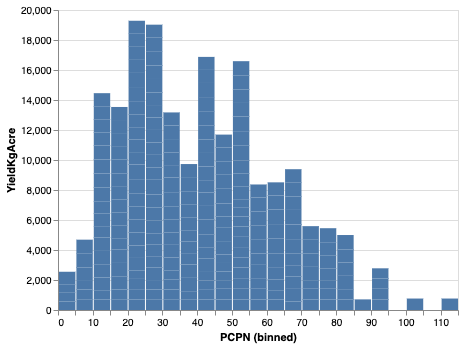

In [221]:
alt.Chart(pcpn_yield_id_year_week_group).mark_bar().encode(
    alt.X("PCPN:Q",bin=alt.Bin(extent=[0, 115], step=5)),
    alt.Y('YieldKgAcre:Q')
)

##### 20-30 seems ideal, but diminishing returns beyond that point

In [ ]:
SumFrost_filter_col=["YEAR","YieldKgAcre"]+[col for col in climate_yield_ndvi_soil_merged if col.startswith("SumFrost")]
SumFrost=climate_yield_ndvi_soil_merged[SumFrost_filter_col]
SumFrost_melt=pd.melt(SumFrost,id_vars=["YEAR","YieldKgAcre"],var_name='week',value_name='SUMFROST')
SumFrost_melt["week"]=SumFrost_melt["week"].str.slice(start=7)
SumFrost_yield_id_year_week_group = SumFrost_melt.groupby(["YEAR","week"]).mean().reset_index()
#alt.Chart(SumFrost_yield_id_year_week_group).mark_circle(color="red").encode(
#    alt.X('SUMFROST'),
#    alt.Y('YieldKgAcre'),
#).properties(width=600)


In [ ]:
#alt.Chart(SumFrost_yield_id_year_week_group).mark_bar().encode(
#    alt.X("SUMFROST:Q",bin=alt.Bin(extent=[0, 20], step=1)),
#    alt.Y('YieldKgAcre:Q')
#)

In [213]:
#alt.Chart(SumFrost_yield_id_year_week_group).mark_circle().encode(
#    alt.X('SUMFROST:Q', bin=True),
#    alt.Y('YieldKgAcre:Q', bin=True),
#    size='count()'
#)

In [214]:
Ndvi_filter_col=["YEAR","YieldKgAcre"]+[col for col in climate_yield_ndvi_soil_merged if col.startswith("NDVI")]
Ndvi=climate_yield_ndvi_soil_merged[Ndvi_filter_col]
Ndvi_melt=pd.melt(Ndvi,id_vars=["YEAR","YieldKgAcre"],var_name='week',value_name='NDVI')
Ndvi_melt["week"]=Ndvi_melt["week"].str.slice(start=7)
Ndvi_yield_id_year_week_group = Ndvi_melt.groupby(["YEAR","week"]).mean().reset_index()
#alt.Chart(Ndvi_yield_id_year_week_group).mark_circle(color="red").encode(
#    alt.X('NDVI'),
#    alt.Y('YieldKgAcre'),
#).properties(width=600)


#### NDVI to Yield

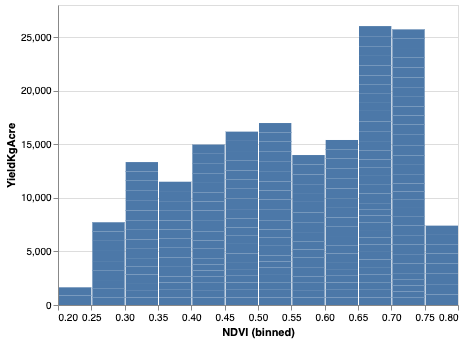

In [215]:
alt.Chart(Ndvi_yield_id_year_week_group).mark_bar().encode(
    alt.X("NDVI:Q",bin=alt.Bin(extent=[0.2, 0.8], step=0.05)),
    alt.Y('YieldKgAcre:Q')
)

##### Our goal is to achieve a NDVI value of 0.65 to 0.75, but there seems to be a big dropoff after that. Why?

In [216]:
SumEGDD_filter_col=["YEAR","YieldKgAcre"]+[col for col in climate_yield_ndvi_soil_merged if col.startswith("SumEGDD")]
SumEGDD=climate_yield_ndvi_soil_merged[SumEGDD_filter_col]
SumEGDD_melt=pd.melt(SumEGDD,id_vars=["YEAR","YieldKgAcre"],var_name='week',value_name='SUMEGDD')
SumEGDD_melt["week"]=SumEGDD_melt["week"].str.slice(start=7)
SumEGDD_yield_id_year_week_group = SumEGDD_melt.groupby(["YEAR","week"]).mean().reset_index()
#alt.Chart(SumEGDD_yield_id_year_week_group).mark_circle(color="red").encode(
#    alt.X('SUMEGDD'),
#    alt.Y('YieldKgAcre'),
#).properties(width=600)


#### Growing days to Yield

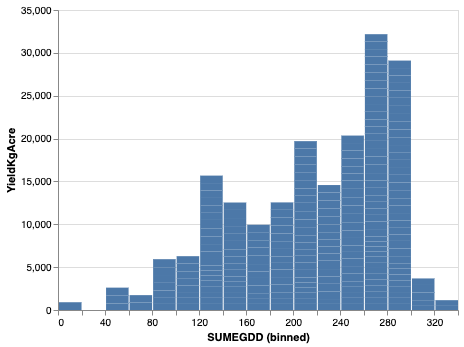

In [206]:
alt.Chart(SumEGDD_yield_id_year_week_group).mark_bar().encode(
    alt.X("SUMEGDD:Q",bin=alt.Bin(extent=[0, 340], step=20)),
    alt.Y('YieldKgAcre:Q')
)

##### Growing days for cool season crops being higher is ideal but why does it diminish after 300?

In [217]:
AvgPrcnAWHC_filter_col=["YEAR","YieldKgAcre"]+[col for col in climate_yield_ndvi_soil_merged if col.startswith("AvgPrcnAWHC")]
AvgPrcnAWHC=climate_yield_ndvi_soil_merged[AvgPrcnAWHC_filter_col]
AvgPrcnAWHC_melt=pd.melt(AvgPrcnAWHC,id_vars=["YEAR","YieldKgAcre"],var_name='week',value_name='AVGPRCNAWHC')
AvgPrcnAWHC_melt["week"]=AvgPrcnAWHC_melt["week"].str.slice(start=7)
AvgPrcnAWHC_yield_id_year_week_group = AvgPrcnAWHC_melt.groupby(["YEAR","week"]).mean().reset_index()
#alt.Chart(AvgPrcnAWHC_yield_id_year_week_group).mark_circle(color="red").encode(
#    alt.X('AVGPRCNAWHC'),
#    alt.Y('YieldKgAcre'),
#).properties(width=600)


#### Soil Moisture ratio to Water Holding Capacity to Yield

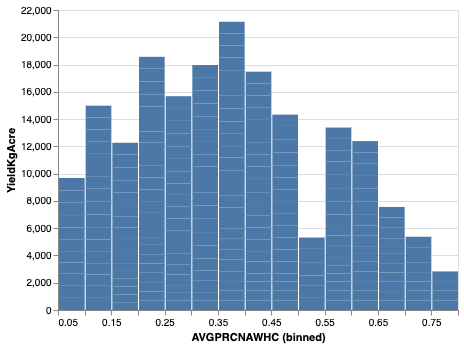

In [207]:
alt.Chart(AvgPrcnAWHC_yield_id_year_week_group).mark_bar().encode(
    alt.X("AVGPRCNAWHC:Q",bin=alt.Bin(extent=[0.05, 0.80], step=0.05)),
    alt.Y('YieldKgAcre:Q')
)

##### Bell Curve pattern

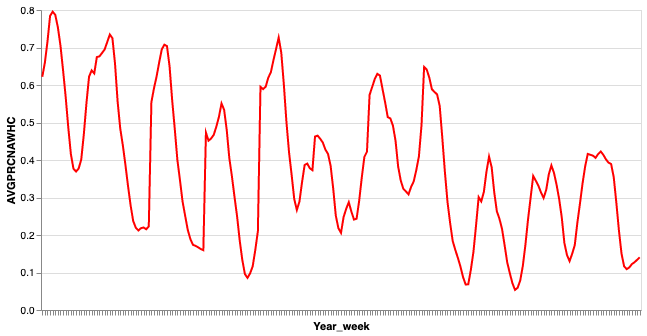

In [124]:
AvgPrcnAWHC_yield_id_year_week_group["Year_week"]=AvgPrcnAWHC_yield_id_year_week_group["YEAR"].astype(str)+"_"+AvgPrcnAWHC_yield_id_year_week_group["week"].astype(str)
alt.Chart(AvgPrcnAWHC_yield_id_year_week_group).mark_line(color="red").encode(
    alt.X('Year_week',axis=alt.Axis(labels=False)),
    alt.Y('AVGPRCNAWHC'),
).properties(width=600)

##### Slow and steady decline

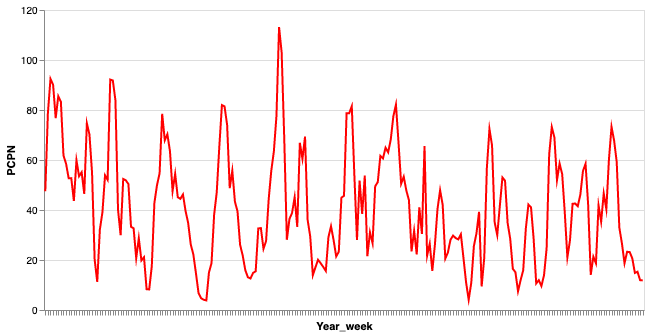

In [120]:
pcpn_yield_id_year_week_group["Year_week"]=pcpn_yield_id_year_week_group["YEAR"].astype(str)+"_"+pcpn_yield_id_year_week_group["week"].astype(str)
alt.Chart(pcpn_yield_id_year_week_group).mark_line(color="red").encode(
    alt.X('Year_week',axis=alt.Axis(labels=False)),
    alt.Y('PCPN'),
).properties(width=600)

##### slight decline over the years in percipitation, could this be related to the soil moisture decline?

In [218]:
#SumFrost_yield_id_year_week_group["Year_week"]=SumFrost_yield_id_year_week_group["YEAR"].astype(str)+"_"+SumFrost_yield_id_year_week_group["week"].astype(str)
#alt.Chart(SumFrost_yield_id_year_week_group).mark_line(color="red").encode(
#    alt.X('Year_week',axis=alt.Axis(labels=False)),
#    alt.Y('SUMFROST'),
#).properties(width=600)

In [219]:
#Ndvi_yield_id_year_week_group["Year_week"]=Ndvi_yield_id_year_week_group["YEAR"].astype(str)+"_"+Ndvi_yield_id_year_week_group["week"].astype(str)
#alt.Chart(Ndvi_yield_id_year_week_group).mark_line(color="red").encode(
#    alt.X('Year_week',axis=alt.Axis(labels=False)),
#    alt.Y('NDVI'),
#).properties(width=600)

In [220]:
#SumEGDD_yield_id_year_week_group["Year_week"]=SumEGDD_yield_id_year_week_group["YEAR"].astype(str)+"_"+SumEGDD_yield_id_year_week_group["week"].astype(str)
#alt.Chart(SumEGDD_yield_id_year_week_group).mark_line(color="red").encode(
#    alt.X('Year_week',axis=alt.Axis(labels=False)),
#    alt.Y('SUMEGDD'),
#).properties(width=600)

In [130]:
#import altair as alt

#alt.renderers.enable('mimetype')
#alt.data_transformers.enable('data_server')
#cor_data = (climate_yield_ndvi_soil_merged.drop(columns=["TWP_ID","ECODISTRICT_ID","YEAR"])
#            .corr().stack().reset_index().rename(columns={0:'correlation','level_0':'variable','level_1':'variable2'}))
#cor_data['correlation_label']=cor_data['correlation'].map('{:.2f}'.format)
#cor_data['correlation_label']=pd.to_numeric(cor_data['correlation_label'])

#base=alt.Chart(cor_data).encode(x='variable2:O',y='variable:O')
#text=base.mark_text().encode(
#    text='correlation_label',
#    color=alt.condition(
#        alt.datum.correlation>0.5,
#        alt.value('white'),
#        alt.value('black')
#    )
#)
#cor_plot=base.mark_rect().encode(
#    color='correlation:Q'
#).properties(
#    width=5000,
#    height=5000
#)+text
#cor_plot